In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

df = pl.read_parquet("../0 - Data/2 - clean/clean_transactions.pq")

#### Display basic info and statistics

In [3]:
df.head()

User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
i64,i64,i32,i32,i32,f64,str,str,str,str,str,i64,str,i64,str,str,i64,date,i64,i32,i64,f64,date,i64,i32,str,i64,i64,i64,i64,str,str,str,str,str,i64,f64,f64,f64,f64,f64,i64,i64,datetime[μs],i32
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",0,"""Visa""","""Debit""",4344676511950444,2022-12-01,623,1,2,24295.0,2002-09-01,2008,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",1,"""Visa""","""Debit""",4956965974959986,2020-12-01,393,1,2,21968.0,2014-04-01,2014,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",2,"""Visa""","""Debit""",4582313478255491,2024-02-01,719,1,2,46414.0,2003-07-01,2004,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",3,"""Visa""","""Credit""",4879494103069057,2024-08-01,693,0,1,12400.0,2003-01-01,2012,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0
0,0,2018,1,2,130.95,"""Chip Transaction""","""5817218446178736267""","""La Verne""","""CA""","""91750.0""",5912,"""0""",4,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,2009-03-01,75,1,1,28.0,2008-09-01,2009,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""","""Unknown""","""La Verne""","""CA""",91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,2018-01-02 06:28:00,0


In [4]:
df.describe()

statistic,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,str,f64,str,str,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""","""13412376""","""13412376""","""13412376""","""13412376""",1.3412376e7,"""13412376""",1.3412376e7,"""13412376""","""13412376""",1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""","""13412376""","""13412376""","""13412376""","""13412376""",1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,1.3412376e7,"""13412376""",1.3412376e7
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",1002.737827,1.639935,2018.62601,6.105401,15.68379,42.325018,null,null,null,null,null,5566.651178,null,1.642844,null,null,4.8116e15,"""2020-10-08 03:59:33.801000""",501.849758,0.897934,1.501158,15117.731069,"""2009-09-23 20:02:43.454000""",2012.515183,0.0,null,54.689428,66.635556,1964.494094,6.539578,null,null,null,null,null,51102.928514,37.376546,-91.888987,23982.680687,46280.604919,54871.721376,719.693857,4.285687,"""2019-02-03 06:56:47.429256""",0.001379
"""std""",566.475651,1.520289,0.633889,3.586253,8.780264,79.643736,null,null,null,null,null,885.569016,null,1.512109,null,null,1.3390e15,null,289.189166,0.302735,0.517767,12430.036744,null,3.713661,0.0,null,17.219758,3.424748,17.201001,3.567259,null,null,null,null,null,29592.620728,5.111493,16.549955,11826.424333,23978.209502,51931.712548,62.717442,1.586708,null,0.037113
"""min""",0.0,0.0,2018.0,1.0,1.0,-500.0,"""Chip Transaction""","""-1000080909058489971""","""Abbeville""","""AA""","""10001.0""",1711.0,"""0""",0.0,"""Amex""","""Credit""",3.0011e14,"""1997-07-01""",0.0,0.0,1.0,0.0,"""1991-01-01""",2002.0,0.0,"""Aaden Campbell""",18.0,50.0,1918.0,1.0,"""Female""","""0 Elm Street""","""1""","""Abbeville""","""AK""",1060.0,20.88,-159.41,0.0,1.0,0.0,480.0,1.0,"""2018-01-01 00:03:00""",0.0
"""25%""",517.0,0.0,2018.0,3.0,8.0,8.9,null,null,null,null,null,5300.0,null,0.0,null,null,4.4899e15,"""2020-03-01""",253.0,1.0,1.0,7564.0,"""2006-03-01""",2010.0,0.0,null,42.0,65.0,1953.0,3.0,null,null,null,null,null,28306.0,33.88,-97.64,17093.0,32583.0,12545.0,688.0,3.0,"""2018-07-19 11:25:00""",0.0
"""50%""",1006.0,1.0,2019.0,6.0,16.0,28.33,null,null,null,null,null,5499.0,null,1.0,null,null,5.1011e15,"""2021-09-01""",508.0,1.0,1.0,13200.0,"""2009-06-01""",2012.0,0.0,null,52.0,67.0,1967.0,7.0,null,null,null,null,null,47424.0,38.35,-86.86,21234.0,40848.0,47179.0,720.0,4.0,"""2019-02-03 12:55:00""",0.0
"""75%""",1477.0,3.0,2019.0,9.0,23.0,62.02,null,null,null,null,null,5813.0,null,3.0,null,null,5.5825e15,"""2023-06-01""",749.0,1.0,2.0,20311.0,"""2013-01-01""",2015.0,0.0,null,66.0,68.0,1977.0,10.0,null,null,null,null,null,77586.0,41.12,-80.13,27308.0,53986.0,81825.0,761.0,5.0,"""2019-08-21 14:47:00""",0.0
"""max""",1999.0,8.0,2020.0,12.0,31.0,6613.44,"""Swipe Transaction""","""999682974109284083""","""Zwolle""","""Zimbabwe""","""Unknown""",9402.0,"""Technical Glitch""",8.0,"""Visa""","""Debit (Prepaid)""",6.9972e15,"""2024-12-01""",999.0,1.0,3.0,151223.0,"""2020-02-01""",2020.0,0

array([[<Axes: title={'center': 'User'}>,
        <Axes: title={'center': 'Card'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'MCC'}>,
        <Axes: title={'center': 'CARD INDEX'}>,
        <Axes: title={'center': 'Card Number'}>,
        <Axes: title={'center': 'Expires'}>,
        <Axes: title={'center': 'CVV'}>,
        <Axes: title={'center': 'Has Chip'}>],
       [<Axes: title={'center': 'Cards Issued'}>,
        <Axes: title={'center': 'Credit Limit'}>,
        <Axes: title={'center': 'Acct Open Date'}>,
        <Axes: title={'center': 'Year PIN last Changed'}>,
        <Axes: title={'center': 'Card on Dark Web'}>,
        <Axes: title={'center': 'Current Age'}>],
       [<Axes: title={'center': 'Retirement Age'}>,
        <Axes: title={'center': 'Birth Year'}>,
        <Axes: title={'center': 'Birth Month'}>,
        <A

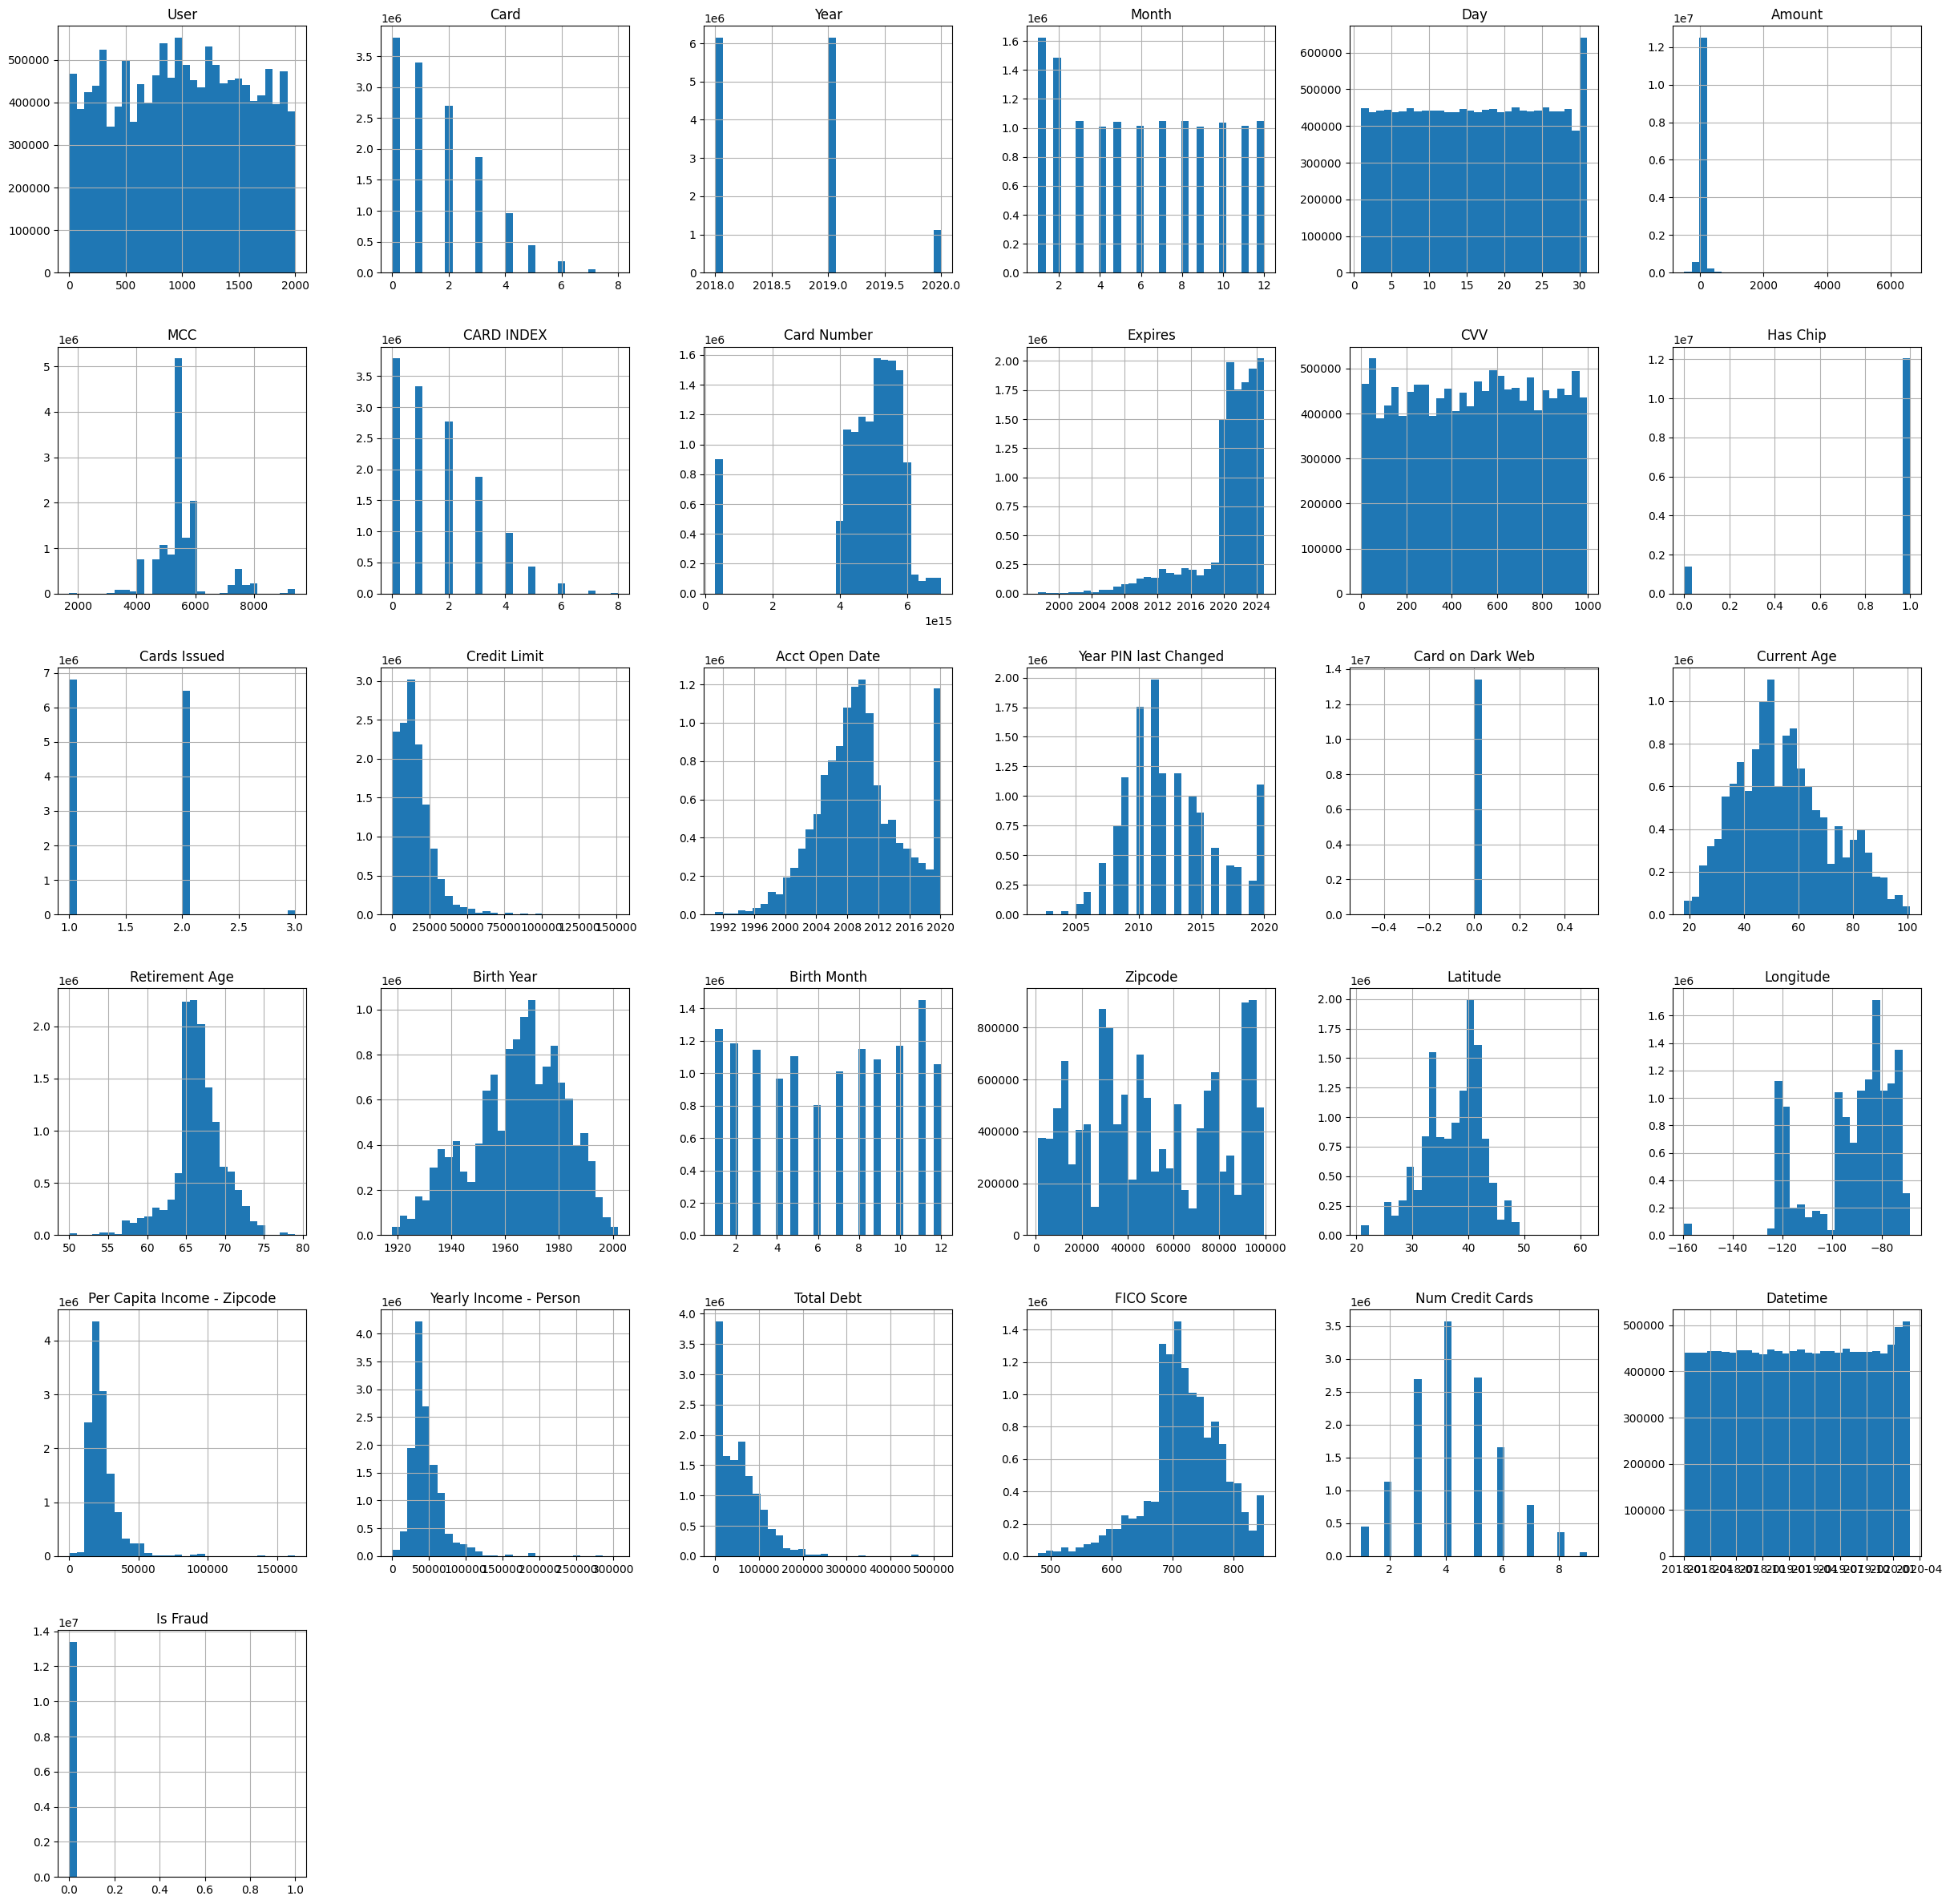

In [6]:
df.to_pandas().hist(bins=30, figsize=(30, 30))

### Frauds Representation in the Data

C:\Users\samos\AppData\Local\Temp\ipykernel_32272\2860281513.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  counts = df.group_by("Is Fraud?").agg(pl.count())


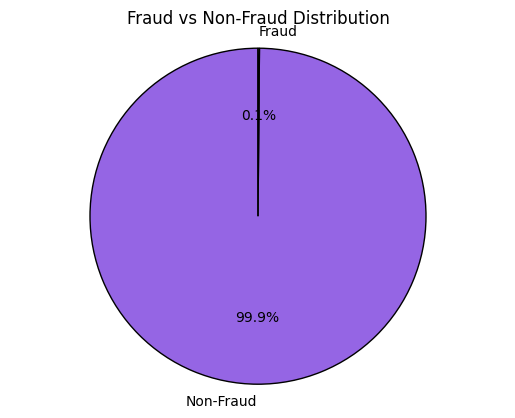

In [114]:
# Count frauds and non-frauds explicitly by grouping the "Is Fraud?" column
counts = df.group_by("Is Fraud?").agg(pl.count())

# Extract the counts for True (fraud) and False (non-fraud)
fraud_count = counts.filter(pl.col("Is Fraud?") == "Yes")['count'][0]  # True means Fraud
non_fraud_count = counts.filter(pl.col("Is Fraud?") == "No")['count'][0]  # False means Non-Fraud

# Data for the pie chart
labels = ["Non-Fraud", "Fraud"]
sizes = [non_fraud_count, fraud_count]
colors = ['#9565e4', '#f9f871']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title
plt.title('Fraud vs Non-Fraud Distribution')

# Show plot
plt.show()

#### Transaction Frequency by Months / by Years

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_37636\245787349.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  monthly_counts = df.group_by(["Year", "Month"]).agg(pl.count().alias("Transaction Count"))


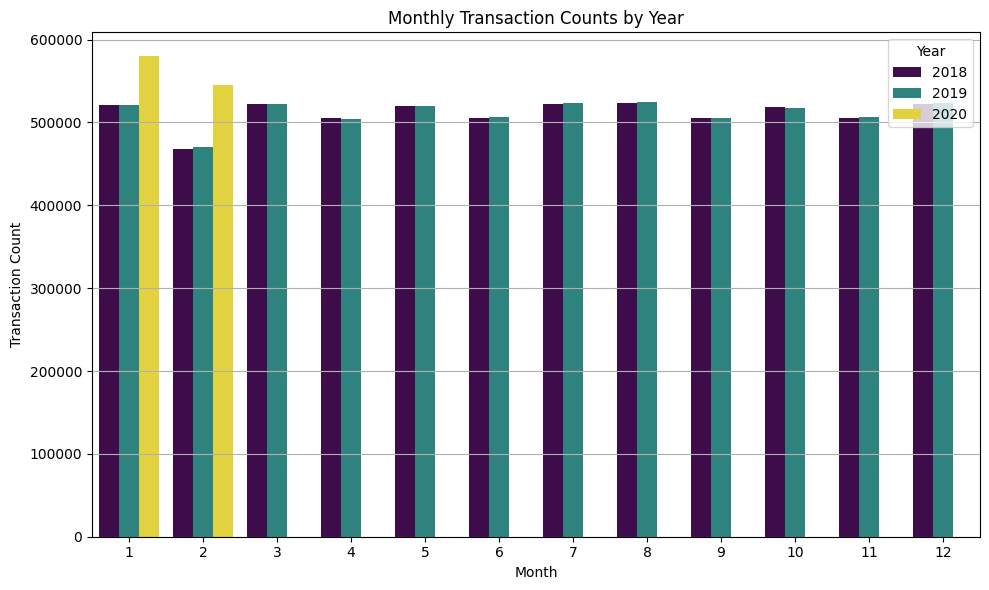

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count rows with the same Year and Month
monthly_counts = df.group_by(["Year", "Month"]).agg(pl.count().alias("Transaction Count"))

# Convert Polars DataFrame to Pandas DataFrame
monthly_counts_df = monthly_counts.to_pandas()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_counts_df, x='Month', y='Transaction Count', hue='Year', palette='viridis')

# Customize the plot
plt.title('Monthly Transaction Counts by Year')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#### Transaction Frequency Daily AVG by Months / by Year

C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1419173293.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  daily_counts = df.group_by(["Year", "Month", "Day"]).agg(pl.count().alias("Transaction Count"))


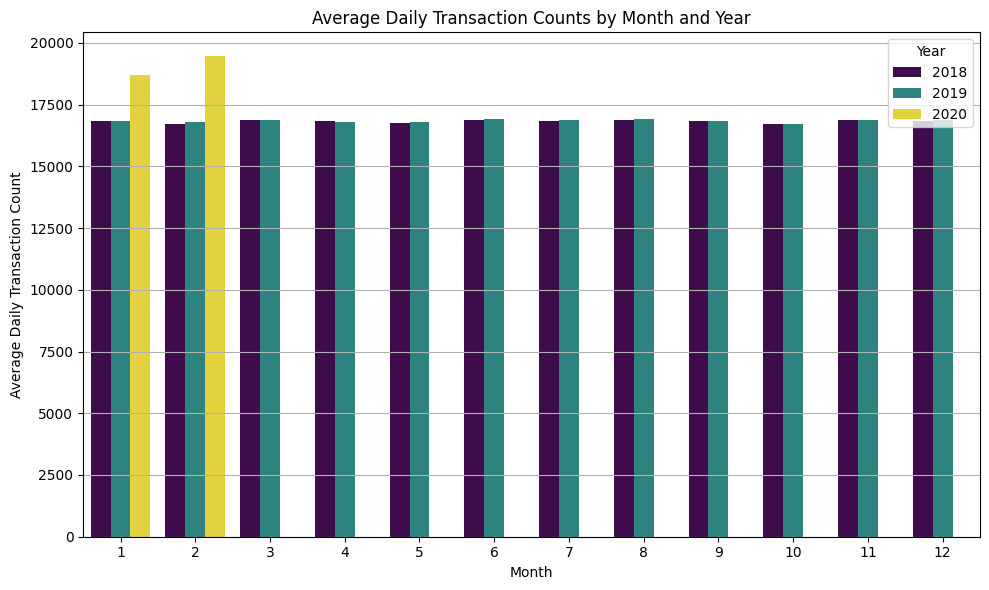

In [111]:
# Count daily transactions
daily_counts = df.group_by(["Year", "Month", "Day"]).agg(pl.count().alias("Transaction Count"))

# Calculate the average daily transaction count for each Month and Year
avg_daily_counts = daily_counts.group_by(["Year", "Month"]).agg(pl.mean("Transaction Count").alias("Avg Daily Transaction Count"))

# Convert Polars DataFrame to Pandas DataFrame
avg_daily_counts_df = avg_daily_counts.to_pandas()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_daily_counts_df, x='Month', y='Avg Daily Transaction Count', hue='Year', palette='viridis')

# Customize the plot
plt.title('Average Daily Transaction Counts by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Transaction Count')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## Identify Significant Columns

First, I will create two subsets: `fraud_df` and `non_fraud_df`. Then, I will examine the comprehensive statistics provided by Polars using `df.describe()`. This will help me quickly review the data and identify potentially significant columns.

In [113]:
fraud_df = df.filter(pl.col("Is Fraud?") == "Yes")
non_fraud_df = df.filter(pl.col("Is Fraud?") == "No")

fraud_df.describe()

statistic,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
str,str,str,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,f64,str,str,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64,f64,str,f64
"""count""","""18499""","""18499""",18499.0,18499.0,18499.0,18499.0,"""18499""","""18499""","""18499""","""18499""","""18499""",18499.0,"""18499""","""18499""",18499.0,"""18499""","""18499""",18499.0,"""18499""",18499.0,18499.0,18499.0,18499.0,"""18499""",18499.0,18499.0,"""18499""",18499.0,18499.0,18499.0,18499.0,"""18499""","""18499""","""18499""","""18499""","""18499""",18499.0,18499.0,18499.0,"""18499""",18499.0,18499.0,18499.0,18499.0,"""18499""",18499.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,2018.463593,6.294881,15.361749,79.073554,null,null,null,null,null,5207.156819,null,null,1.867236,null,null,4.8260e15,null,499.532407,0.906427,1.497919,14823.963836,null,2012.355911,0.0,null,58.530948,66.777718,1960.646792,6.545867,null,null,null,null,null,49439.665171,37.265353,-91.121771,null,44049.706146,52021.906319,720.810963,4.734472,"""2018-12-11 09:22:23.852100""",1.0
"""std""",null,null,0.498686,3.246649,9.070426,146.011731,null,null,null,null,null,789.920394,null,null,1.627454,null,null,1.3084e15,null,293.48688,0.291241,0.514608,12374.042015,null,3.550012,0.0,null,16.499274,3.107735,16.502381,3.608922,null,null,null,null,null,28644.793236,5.246717,16.379558,null,23017.026536,59954.121711,61.053275,1.609884,null,0.0
"""min""","""1""","""0""",2018.0,1.0,1.0,-484.0,"""Chip Transaction""","""-112121233619748226""","""Marion""","""Italy""","""43301.0""",3000.0,"""0""","""Yes""",0.0,"""Amex""","""Credit""",3.0011e14,"""01/2002""",0.0,0.0,1.0,0.0,"""01/1995""",2002.0,0.0,"""Aaliyah Martin""",21.0,53.0,1921.0,1.0,"""Female""","""1 Burns Lane""","""1""","""Ainsworth""","""AL""",1602.0,21.3,-158.01,"""$0""",1.0,0.0,489.0,1.0,"""2018-01-01 10:49:00""",1.0
"""25%""",null,null,2018.0,4.0,7.0,8.37,null,null,null,null,null,5211.0,null,null,1.0,null,null,4.4931e15,null,245.0,1.0,1.0,7300.0,null,2010.0,0.0,null,47.0,65.0,1948.0,3.0,null,null,null,null,null,28025.0,33.69,-96.73,null,31244.0,8942.0,688.0,4.0,"""2018-07-06 15:12:00""",1.0
"""50%""",null,null,2018.0,6.0,15.0,35.33,null,null,null,null,null,5311.0,null,null,2.0,null,null,5.0819e15,null,523.0,1.0,1.0,12600.0,null,2012.0,0.0,null,58.0,67.0,1961.0,7.0,null,null,null,null,null,45833.0,38.44,-87.18,null,39214.0,36262.0,722.0,5.0,"""2018-12-03 15:55:00""",1.0
"""75%""",null,null,2019.0,9.0,23.0,97.38,null,null,null,null,null,5651.0,null,null,3.0,null,null,5.5941e15,null,754.0,1.0,2.0,19525.0,null,2015.0,0.0,null,71.0,69.0,1973.0,10.0,null,null,null,null,null,75551.0,41.09,-79.97,null,51703.0,78115.0,760.0,6.0,"""2019-05-21 11:06:00""",1.0
"""max""","""987""","""8""",2019.0,12.0,31.0,1442.63,"""Swipe Transaction""","""9057735476014445185""","""Rome""","""Unknown""","""Unknown""",9402.0,"""Technical Glitch""","""Yes""",8.0,"""Visa""","""Debit (Prepaid)""",6.9871e15,"""12/2024""",999.0,1.0,3.0,130971.0,"""12/2016""",2020.0,0.0,"""Zyaire Baker""",98.0,77.0,1998.0,12.0,"""Male""","""9983 Park Drive""","""Unknown""","""Worcester""","""WY""",98642.0,47.94,-68.67,"""$9389""",185909.0,461854.0,850.0,9.0,"""2019-10-27 14:54:00""",1.0


In [4]:
non_fraud_df.describe()

statistic,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Datetime,Is Fraud
str,str,str,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,f64,str,str,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,str,f64,f64,f64,f64,str,f64
"""count""","""13393877""","""13393877""",1.3393877e7,1.3393877e7,1.3393877e7,1.3393877e7,"""13393877""","""13393877""","""13393877""","""13393877""","""13393877""",1.3393877e7,"""13393877""","""13393877""",1.3393877e7,"""13393877""","""13393877""",1.3393877e7,"""13393877""",1.3393877e7,1.3393877e7,1.3393877e7,1.3393877e7,"""13393877""",1.3393877e7,1.3393877e7,"""13393877""",1.3393877e7,1.3393877e7,1.3393877e7,1.3393877e7,"""13393877""","""13393877""","""13393877""","""13393877""","""13393877""",1.3393877e7,1.3393877e7,1.3393877e7,"""13393877""",1.3393877e7,1.3393877e7,1.3393877e7,1.3393877e7,"""13393877""",1.3393877e7
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,2018.626235,6.105139,15.684235,42.274263,null,null,null,null,null,5567.147695,null,null,1.642534,null,null,4.8116e15,null,501.852958,0.897923,1.501163,15118.136807,null,2012.515403,0.0,null,54.684122,66.63536,1964.499407,6.53957,null,null,null,null,null,51105.225736,37.376699,-91.890047,null,46283.686133,54875.657408,719.692314,4.285067,"""2019-02-03 08:43:59.272651""",0.0
"""std""",null,null,0.634027,3.586693,8.779849,79.502037,null,null,null,null,null,885.593094,null,null,1.511921,null,null,1.3391e15,null,289.183185,0.30275,0.517771,12430.109566,null,3.713877,0.0,null,17.22014,3.425162,17.201352,3.567201,null,null,null,null,null,29593.845221,5.111302,16.550165,null,23979.367699,51919.669577,62.719699,1.586588,null,0.0
"""min""","""0""","""0""",2018.0,1.0,1.0,-500.0,"""Chip Transaction""","""-1000080909058489971""","""Abbeville""","""AA""","""10001.0""",1711.0,"""0""","""No""",0.0,"""Amex""","""Credit""",3.0011e14,"""01/2002""",0.0,0.0,1.0,0.0,"""01/1991""",2002.0,0.0,"""Aaden Campbell""",18.0,50.0,1918.0,1.0,"""Female""","""0 Elm Street""","""1""","""Abbeville""","""AK""",1060.0,20.88,-159.41,"""$0""",1.0,0.0,480.0,1.0,"""2018-01-01 00:03:00""",0.0
"""25%""",null,null,2018.0,3.0,8.0,8.9,null,null,null,null,null,5300.0,null,null,0.0,null,null,4.4899e15,null,253.0,1.0,1.0,7564.0,null,2010.0,0.0,null,42.0,65.0,1953.0,3.0,null,null,null,null,null,28306.0,33.88,-97.64,null,32583.0,12545.0,688.0,3.0,"""2018-07-19 11:34:00""",0.0
"""50%""",null,null,2019.0,6.0,16.0,28.32,null,null,null,null,null,5499.0,null,null,1.0,null,null,5.1014e15,null,508.0,1.0,1.0,13200.0,null,2012.0,0.0,null,52.0,67.0,1967.0,7.0,null,null,null,null,null,47424.0,38.35,-86.86,null,40848.0,47179.0,720.0,4.0,"""2019-02-03 14:13:00""",0.0
"""75%""",null,null,2019.0,9.0,23.0,62.0,null,null,null,null,null,5813.0,null,null,3.0,null,null,5.5825e15,null,749.0,1.0,2.0,20311.0,null,2015.0,0.0,null,66.0,68.0,1977.0,10.0,null,null,null,null,null,77586.0,41.12,-80.13,null,53995.0,81825.0,761.0,5.0,"""2019-08-21 17:21:00""",0.0
"""max""","""999""","""8""",2020.0,12.0,31.0,6613.44,"""Swipe Transaction""","""999682974109284083""","""Zwolle""","""Zimbabwe""","""Unknown""",9402.0,"""Technical Glitch""","""No""",8.0,"""Visa""","""Debit (Prepaid)""",6.9972e15,"""12/2024""",999.0,1.0,3.0,151223.0,"""12/2019""",2020.0,0.0,"""Zyaire Morales""",101.0,79.0,2002.0,12.0,"""Male""","""9995 Pine Avenue"""

First, I will examine the columns that contain numeric values, such as floats or integers. I will calculate the mean and standard deviation for each of these numeric columns.

#### Potentially Relevant Columns
- Amount
- Cards Issued
- Credit Limit
- Current Age
- Latitude
- Longitude
- FICO Score
- Number of Credit Cards

#### Non-Relevant Columns
- Year
- Month
- Day
- Card Index
- Card Number
- CVV
- MCC
- Retirement Age

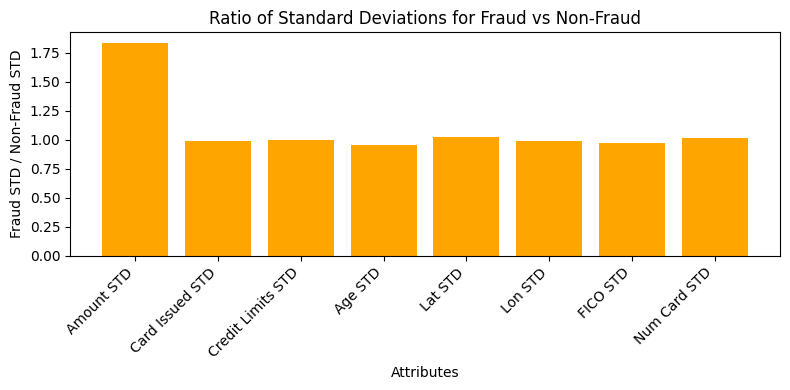

In [33]:
import pandas as pd

fraud_df = df.filter(pl.col("Is Fraud?") == "Yes")
fraud_stds = fraud_df.select([
    pl.col("Amount").std().alias("Amount STD"),
    pl.col("Cards Issued").std().alias("Card Issued STD"),
    pl.col("Credit Limit").std().alias("Credit Limits STD"),
    pl.col("Current Age").std().alias("Age STD"),
    pl.col("Latitude").std().alias("Lat STD"),
    pl.col("Longitude").std().alias("Lon STD"),
    pl.col("FICO Score").std().alias("FICO STD"),
    pl.col("Num Credit Cards").std().alias("Num Card STD"),
])

non_fraud_df = df.filter(pl.col("Is Fraud?") == "No")
non_fraud_stds = non_fraud_df.select([
    pl.col("Amount").std().alias("Amount STD"),
    pl.col("Cards Issued").std().alias("Card Issued STD"),
    pl.col("Credit Limit").std().alias("Credit Limits STD"),
    pl.col("Current Age").std().alias("Age STD"),
    pl.col("Latitude").std().alias("Lat STD"),
    pl.col("Longitude").std().alias("Lon STD"),
    pl.col("FICO Score").std().alias("FICO STD"),
    pl.col("Num Credit Cards").std().alias("Num Card STD"),
])

# Extracting standard deviation values
fraud_stds_values = fraud_stds.to_dict(as_series=False)
non_fraud_stds_values = non_fraud_stds.to_dict(as_series=False)

# Calculating the ratios
ratios = {
    column: fraud_stds_values[column][0] / non_fraud_stds_values[column][0]
    for column in fraud_stds_values.keys()
}

# Converting ratios to a DataFrame for plotting
ratios_df = pd.DataFrame(list(ratios.items()), columns=['Attribute', 'Ratio'])

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(ratios_df['Attribute'], ratios_df['Ratio'], color='#FFA500') 
plt.xlabel('Attributes')
plt.ylabel('Fraud STD / Non-Fraud STD')
plt.title('Ratio of Standard Deviations for Fraud vs Non-Fraud')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

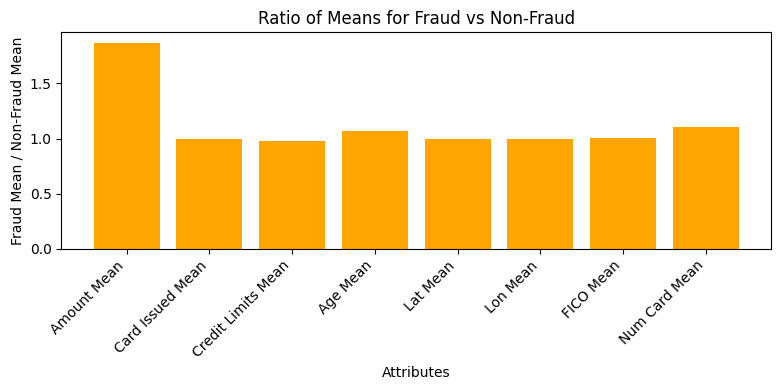

In [35]:
# Compute means for fraud cases
fraud_means = fraud_df.select([
    pl.col("Amount").mean().alias("Amount Mean"),
    pl.col("Cards Issued").mean().alias("Card Issued Mean"),
    pl.col("Credit Limit").mean().alias("Credit Limits Mean"),
    pl.col("Current Age").mean().alias("Age Mean"),
    pl.col("Latitude").mean().alias("Lat Mean"),
    pl.col("Longitude").mean().alias("Lon Mean"),
    pl.col("FICO Score").mean().alias("FICO Mean"),
    pl.col("Num Credit Cards").mean().alias("Num Card Mean"),
])

# Compute means for non-fraud cases
non_fraud_means = non_fraud_df.select([
    pl.col("Amount").mean().alias("Amount Mean"),
    pl.col("Cards Issued").mean().alias("Card Issued Mean"),
    pl.col("Credit Limit").mean().alias("Credit Limits Mean"),
    pl.col("Current Age").mean().alias("Age Mean"),
    pl.col("Latitude").mean().alias("Lat Mean"),
    pl.col("Longitude").mean().alias("Lon Mean"),
    pl.col("FICO Score").mean().alias("FICO Mean"),
    pl.col("Num Credit Cards").mean().alias("Num Card Mean"),
])

# Extracting mean values
fraud_means_values = fraud_means.to_dict(as_series=False)
non_fraud_means_values = non_fraud_means.to_dict(as_series=False)

# Calculating the ratios of means
ratios = {
    column: fraud_means_values[column][0] / non_fraud_means_values[column][0]
    for column in fraud_means_values.keys()
}

# Converting ratios to a DataFrame for plotting
ratios_df = pd.DataFrame(list(ratios.items()), columns=['Attribute', 'Ratio'])

# Plotting with a dark orange color for the bars
plt.figure(figsize=(8, 4))
plt.bar(ratios_df['Attribute'], ratios_df['Ratio'], color='#FFA500')  # Dark orange color
plt.xlabel('Attributes')
plt.ylabel('Fraud Mean / Non-Fraud Mean')
plt.title('Ratio of Means for Fraud vs Non-Fraud')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the analysis above, it's evident that the standard deviation and the mean of the amount of money transferred by fraud cases is nearly twice as high as that of non-fraud cases (approximately 1.8 times). Below, we will take a closer look at this comparison of the amounts transferred in fraud and non-fraud cases.

               Metric       Fraud  Non-Fraud
0              Median   35.330000  28.320000
1                Mean   79.073554  42.274263
2  Standard Deviation  146.011731  79.502037
3                 IQR   89.010000  53.100000


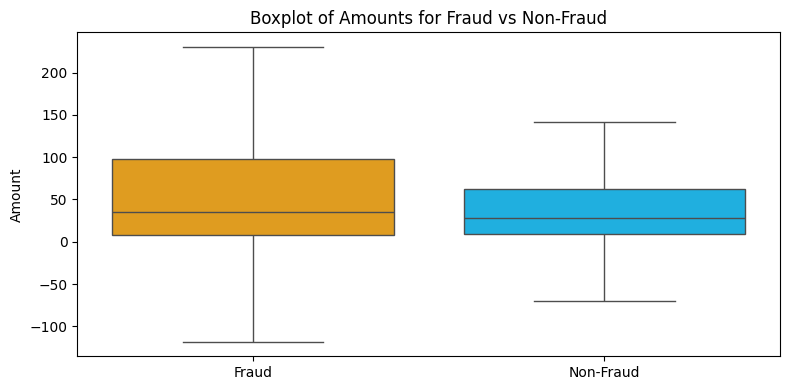

T-test results: t-statistic = 34.27, p-value = 0.0000


In [39]:
import seaborn as sns
from scipy import stats

# Extracting Amounts
amount_fraud = fraud_df.select("Amount").to_numpy().flatten()
amount_non_fraud = non_fraud_df.select("Amount").to_numpy().flatten()

# 1. Calculate Statistics
stats_data = {
    'Metric': ['Median', 'Mean', 'Standard Deviation', 'IQR'],
    'Fraud': [
        np.median(amount_fraud),
        np.mean(amount_fraud),
        np.std(amount_fraud, ddof=1),
        np.percentile(amount_fraud, 75) - np.percentile(amount_fraud, 25)
    ],
    'Non-Fraud': [
        np.median(amount_non_fraud),
        np.mean(amount_non_fraud),
        np.std(amount_non_fraud, ddof=1),
        np.percentile(amount_non_fraud, 75) - np.percentile(amount_non_fraud, 25)
    ]
}

stats_df = pd.DataFrame(stats_data)

# 2. Print the statistics
print(stats_df)

# 3. Boxplot for visual comparison
plt.figure(figsize=(8, 4))
sns.boxplot(data=[amount_fraud, amount_non_fraud], palette=["#FFA500", "#00BFFF"], showfliers=False)
plt.xticks([0, 1], ['Fraud', 'Non-Fraud'])
plt.ylabel('Amount')
plt.title('Boxplot of Amounts for Fraud vs Non-Fraud')
plt.tight_layout()
plt.show()

# 4. Perform a T-test
t_stat, p_value = stats.ttest_ind(amount_fraud, amount_non_fraud, equal_var=False)

# 5. Print T-test results
print(f"T-test results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

The box plot comparing the "Amount" for fraud and non-fraud transactions reveals significant differences in their distributions. The median amount for fraud (35.33) is higher than for non-fraud (28.32), indicating that fraudulent transactions tend to be larger on average. Additionally, the mean for fraud (79.07) is much greater than for non-fraud (42.27), suggesting the influence of high outliers in the fraud group. The standard deviation is also notably larger for fraud (146.01) compared to non-fraud (79.50), reflecting greater variability in fraudulent amounts. The interquartile range (IQR) for fraud (89.01) exceeds that of non-fraud (53.10), indicating a wider spread of the middle 50% of data, which may lead to more extreme values being displayed as outliers in the box plot. Overall, these statistics highlight that fraudulent transactions not only have higher amounts but also exhibit greater variability, emphasizing the need for careful monitoring in fraud detection.

Now, I will examine the columns that contain class values, such as strings. I will compare the number of different values and also the most observed value for a given column.

#### Potentially Relevant Columns
- Use Chip
- Errors?
- Card Brand
- Card Type
- Gender
- State

#### Non-Relevant Columns
- User
- Card
- Merchant Name
- Merchant City
- Merchant State
- Expires
- Acct Open Date
- Person

In [117]:
def plot_normalized_comparison(fraud_df, non_fraud_df, column_name, y_limit=0, figsize=(10,6)):
    """
    This function takes two dataframes (fraud and non-fraud), groups them by the specified column,
    normalizes the counts to percentages, and then plots a side-by-side bar chart for comparison.
    
    :param fraud_df: DataFrame containing fraud data
    :param non_fraud_df: DataFrame containing non-fraud data
    :param column_name: The column name by which to group and compare the data
    :param y_limit: Minimum value that needs to be exceeded for the x-axis labels to show up
    :param figsize: The size of the figure for the plot
    """
    # Group by the specified column and count
    use_chip_counts_fraud = fraud_df.group_by(column_name).count()
    use_chip_counts_non_fraud = non_fraud_df.group_by(column_name).count()

    # Convert to dictionary for easier alignment
    fraud_dict = dict(zip(use_chip_counts_fraud[column_name], use_chip_counts_fraud['count']))
    non_fraud_dict = dict(zip(use_chip_counts_non_fraud[column_name], use_chip_counts_non_fraud['count']))

    # Find all unique keys (categories)
    all_keys = set(fraud_dict.keys()).union(set(non_fraud_dict.keys()))

    # Fill missing keys with zero
    fraud_counts = [fraud_dict.get(key, 0) for key in all_keys]
    non_fraud_counts = [non_fraud_dict.get(key, 0) for key in all_keys]

    # Normalize counts to percentages
    fraud_total = sum(fraud_counts)
    non_fraud_total = sum(non_fraud_counts)

    fraud_percentages = [(count / fraud_total) * 100 if fraud_total > 0 else 0 for count in fraud_counts]
    non_fraud_percentages = [(count / non_fraud_total) * 100 if non_fraud_total > 0 else 0 for count in non_fraud_counts]

    # Set up for side-by-side bar plot
    bar_width = 0.35
    index = np.arange(len(all_keys))

    # Create the plot with figsize parameter
    plt.figure(figsize=figsize)

    # Plot fraud percentages
    plt.bar(index, fraud_percentages, bar_width, label="Fraud Transactions")

    # Plot non-fraud percentages (shifted by bar width for side-by-side bars)
    plt.bar(index + bar_width, non_fraud_percentages, bar_width, label="Non-Fraud Transactions")

    # Apply x-axis labels conditionally based on y_limit
    significant_keys = [key if (fraud_percentages[i] > y_limit or non_fraud_percentages[i] > y_limit) else "" for i, key in enumerate(all_keys)]
    
    # Add titles and labels
    plt.title(f"Normalized {column_name} Percentages: Fraud vs Non-Fraud")
    plt.xlabel(column_name)
    plt.ylabel("Percentage (%)")
    plt.xticks(index + bar_width / 2, significant_keys, rotation=45)

    # Add legend
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1300113818.py:13: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  use_chip_counts_fraud = fraud_df.group_by(column_name).count()
C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1300113818.py:14: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  use_chip_counts_non_fraud = non_fraud_df.group_by(column_name).count()


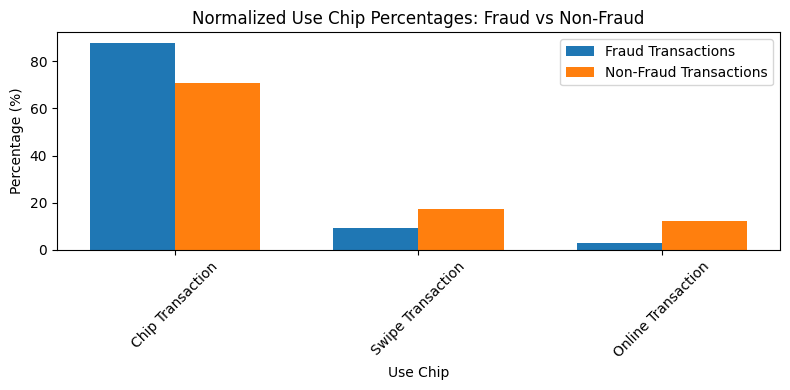

In [119]:
plot_normalized_comparison(fraud_df, non_fraud_df, "Use Chip", figsize=(8, 4))

C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1300113818.py:13: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  use_chip_counts_fraud = fraud_df.group_by(column_name).count()
C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1300113818.py:14: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  use_chip_counts_non_fraud = non_fraud_df.group_by(column_name).count()


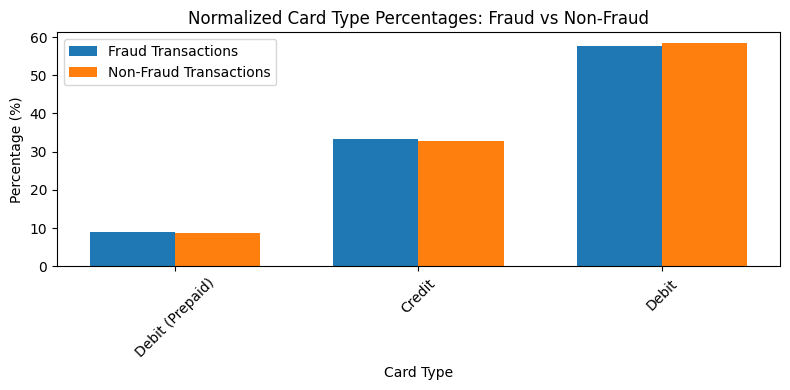

In [120]:
plot_normalized_comparison(fraud_df, non_fraud_df, "Card Type", figsize=(8, 4))

C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1300113818.py:13: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  use_chip_counts_fraud = fraud_df.group_by(column_name).count()
C:\Users\samos\AppData\Local\Temp\ipykernel_32272\1300113818.py:14: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  use_chip_counts_non_fraud = non_fraud_df.group_by(column_name).count()


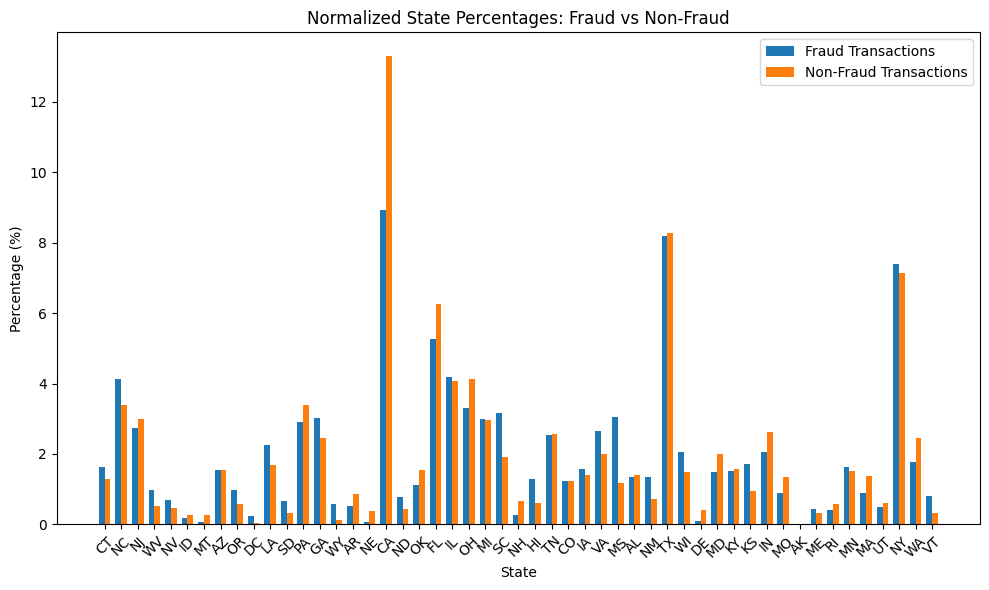

In [124]:
plot_normalized_comparison(fraud_df, non_fraud_df, "State")